In [1]:
import pandas as pd

# DATA OVERVIEW

In [2]:
df_path = "data/E-commerce Dataset.csv"

df = pd.read_csv(df_path)

df.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [4]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000


In [5]:
df.columns.tolist()

['Order_Date',
 'Time',
 'Aging',
 'Customer_Id',
 'Gender',
 'Device_Type',
 'Customer_Login_type',
 'Product_Category',
 'Product',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'Payment_method']

In [6]:
len(df['Customer_Id'].unique().tolist())

38997

In [7]:
len(df['Customer_Id'].unique().tolist()) / 51290

0.7603236498342757

# DATA DISTRIBUTION

In [8]:
from matplotlib import pyplot as plt

plt.style.use('ggplot') 

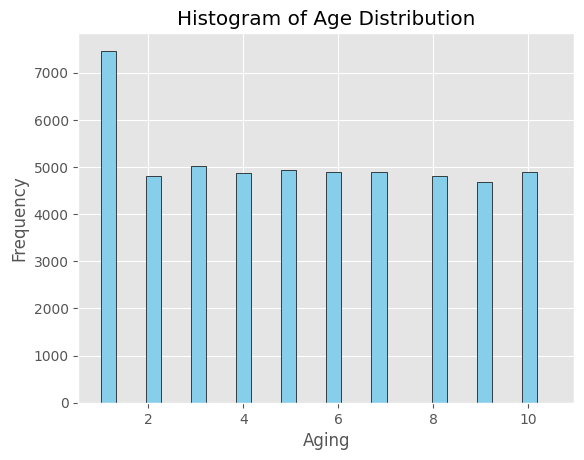

In [9]:
data_dist = df['Aging'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Age Distribution")
plt.xlabel("Aging")
plt.ylabel("Frequency")
plt.show()

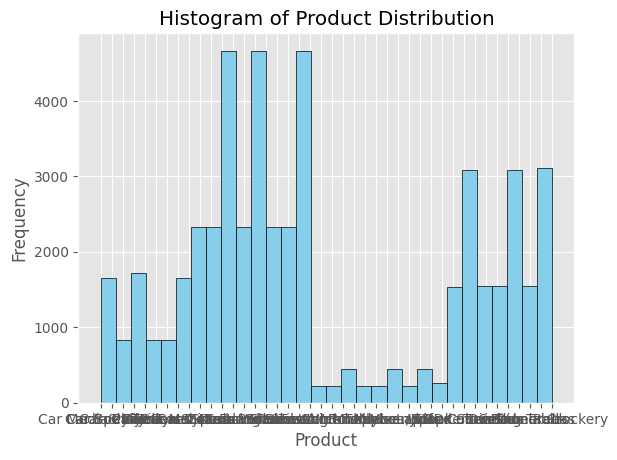

In [10]:
data_dist = df['Product'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Product Distribution")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.show()

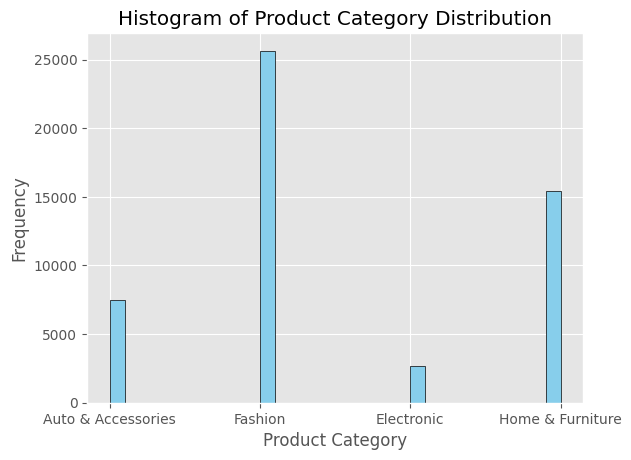

In [11]:
data_dist = df['Product_Category'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Product Category Distribution")
plt.xlabel("Product Category")
plt.ylabel("Frequency")
plt.show()

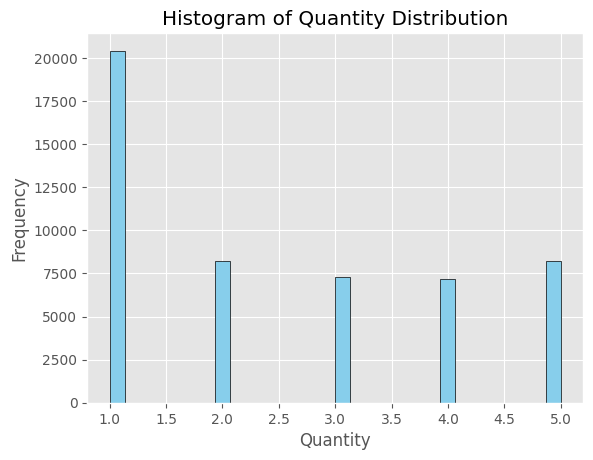

In [12]:
data_dist = df['Quantity'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

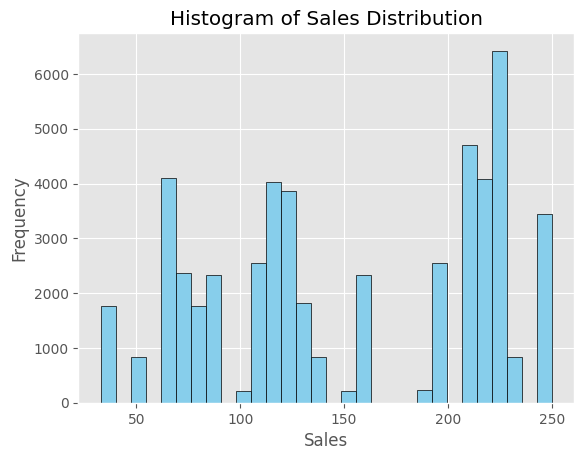

In [13]:
data_dist = df['Sales'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

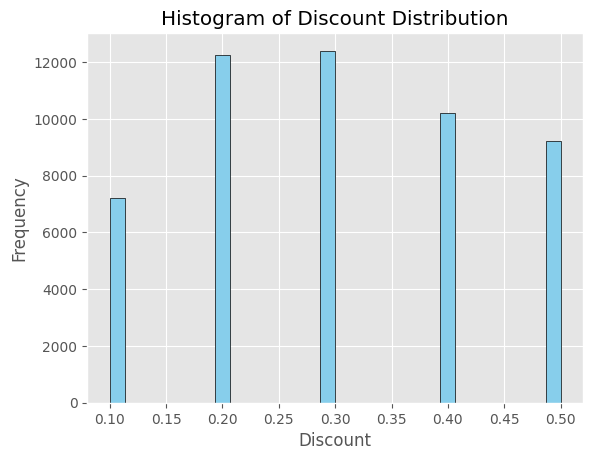

In [14]:
data_dist = df['Discount'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Discount Distribution")
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()

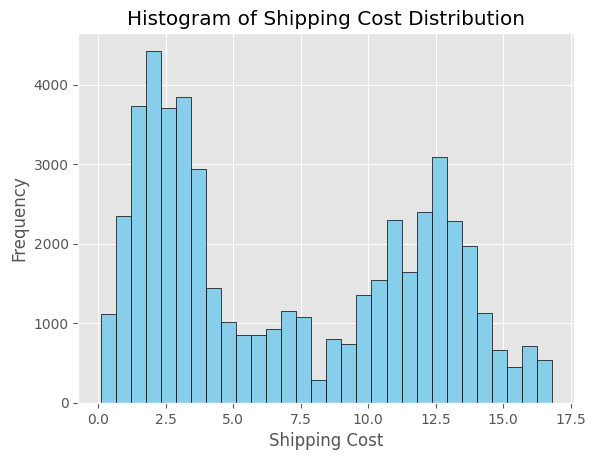

In [15]:
data_dist = df['Shipping_Cost'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Shipping Cost Distribution")
plt.xlabel("Shipping Cost")
plt.ylabel("Frequency")
plt.show()

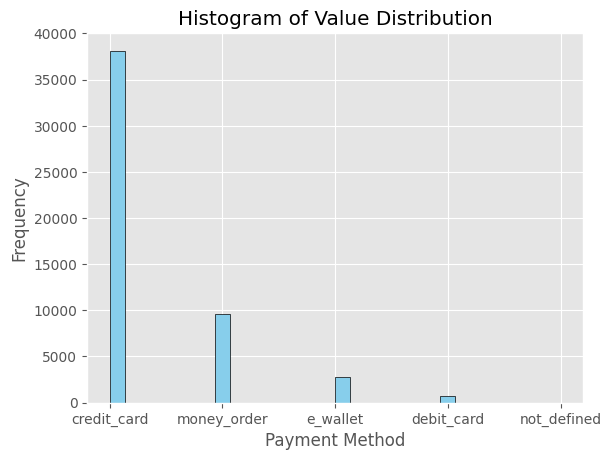

In [16]:
data_dist = df['Payment_method'].hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Value Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Frequency")
plt.show()

## HADOOP PROCESS `[prototyping]`

`T.1` clustering customer by acc transaction

`T.2` analysis the customer payment method and the product category based on the customer acc transaction


In [17]:
# T.1 cust_acc = sales * quantity - discount + shipping cost

def cust_acc(df: pd.DataFrame):
    return df['Sales'] * df['Quantity'] - df['Discount'] + df['Shipping_Cost']

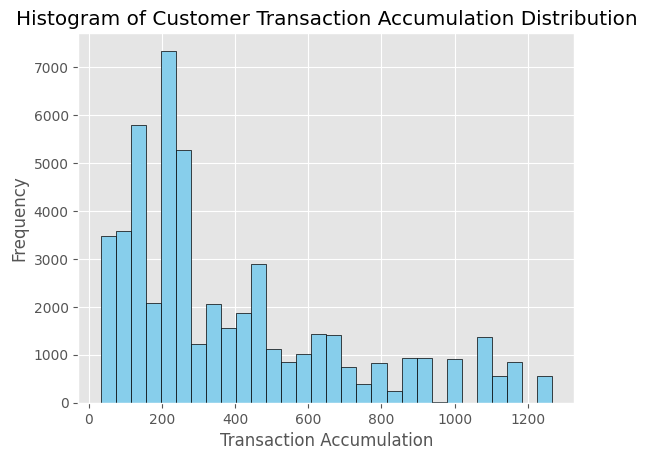

In [18]:
cust_acc(df=df).hist(bins=30, color='skyblue', edgecolor='black')

plt.title("Histogram of Customer Transaction Accumulation Distribution")
plt.xlabel("Transaction Accumulation")
plt.ylabel("Frequency")
plt.show()

In [19]:
# T.2 cust_acc = sales * quantity - discount + shipping cost <-record the product category and payment method

def cust_acc_pc_pm(df: pd.DataFrame):
    cust_acc = df['Sales'] * df['Quantity'] - df['Discount'] + df['Shipping_Cost']
    pc = df['Product_Category']
    pm = df['Payment_method']
    
    return cust_acc, pc, pm

In [20]:
cust_acc, pc, pm = cust_acc_pc_pm(df)

In [21]:
pm_cust_acc = pd.concat([pm, cust_acc], axis=1, keys=['Payment Method', 'Transaction Accumulative'])

pm_cust_acc.head()

,Payment Method,Transaction Accumulative
0,credit_card,144.3
1,credit_card,221.9
2,credit_card,588.0
3,credit_card,120.3
4,credit_card,265.7


In [22]:
pm_cust_acc.groupby('Payment Method').sum()

,Transaction Accumulative
Payment Method,
credit_card,14877299.9
debit_card,269518.7
e_wallet,1081210.6
money_order,3751081.8
not_defined,136.5


Text(0, 0.5, 'Accumulative Transaction')

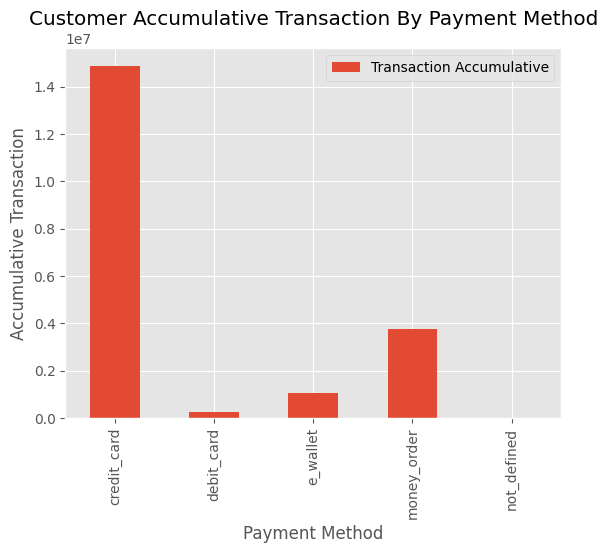

In [23]:
pm_cust_acc.groupby('Payment Method').sum().plot(kind='bar', title='Customer Accumulative Transaction By Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Accumulative Transaction')

In [24]:
pc_cust_acc = pd.concat([pc, cust_acc], axis=1, keys=['Product Category', 'Transaction Accumulative'])

pc_cust_acc.head()

,Product Category,Transaction Accumulative
0,Auto & Accessories,144.3
1,Auto & Accessories,221.9
2,Auto & Accessories,588.0
3,Auto & Accessories,120.3
4,Auto & Accessories,265.7


In [25]:
pc_cust_acc.groupby('Product Category').sum()

,Transaction Accumulative
Product Category,
Auto & Accessories,2620976.6
Electronic,885182.5
Fashion,11496992.0
Home & Furniture,4976096.4


Text(0, 0.5, 'Accumulative Transaction')

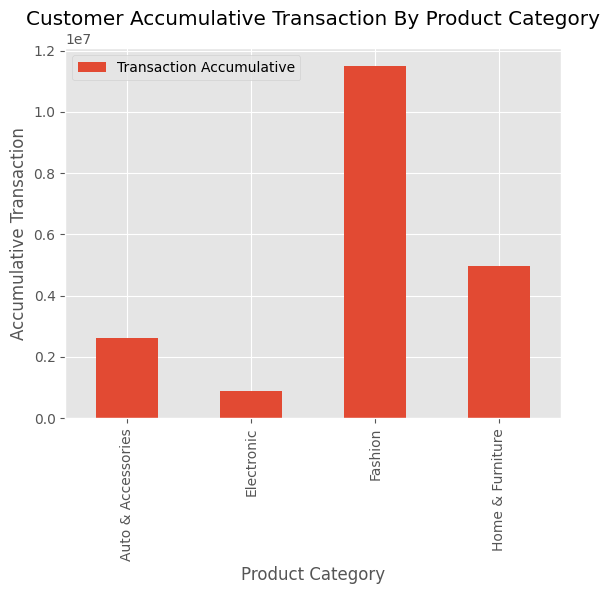

In [26]:
pc_cust_acc.groupby('Product Category').sum().plot(kind='bar', title='Customer Accumulative Transaction By Product Category')
plt.xlabel('Product Category')
plt.ylabel('Accumulative Transaction')
